<h2 align="center">Лабораторна робота №5</h2>
<h5 align="center"><i>Роботу виконала студентка групи ФІ-21, Денисенко Анастасія</i></h5>
<p><b>Тема роботи:</b> "Методи й алгоритми розв'язання задачі про рюкзак".</p>
<p><b>Мета роботи:</b> опанувати принципи роботи наведених у роботі алгоритмів для знаходження розв'язку задачі про рюкзак(наплічник). Розробити відповідне програмне забезпечення, визначити оптимальні параметри його роботи з метою пришвидшення отримання розв'язку задачі.</p>

## Завдання до лабораторної роботи:

1. Познайомитись з методами розв'язування поставленої задачі комбінаторної оптимізації у базовому варіанті.

2. Реалізувати генератор даних для розв'язування задачі про рюкзак (урахувати те, що для згенерованих даних задачі повинна мати розв'язок). Генерацію об'єктів здійснити різної розмірності (різна кількість об'єктів має бути серед вибору). Кількість елементів для кладки в рюкзак взяти меншою за 20.

3. Реалізувати (середовище і мова на вибір студента) два алгоритми розв'язку задачі про рюкзак:

- генетичний алгоритм у класичному його поданні;
- один на вибір -- жадібний або імітації відпалу.
Для кожного набору даних (відповідної розмірності) має бути знайдений розв'язок задач.

4. Взяти текстові файли (два будь-які) зі згенерованими даними (перше число - значення максмальної вмістимості рюказака; два інші числа у наступних рядках - вага та ціна об'єкта відповідно, який може бути покладено (або не покладено) в рюкзак). Протестувати реалізований для задачі генетичний алгоритм на цих даних.

5. Показати динаміку збіжності генетичного алгоритму на основі гістограми популяції, яка змінюється з кожною ітерацією (по осі абсцис - номер хромосоми, по ординат - значення цільової функції). Візуалізацію поточної гістограми можна робити кожні K ітерацій, а не кожну ітерацію, щоб зменшити загальне навантаження на процесор. Також через K ітерацій показати графік кращого знайденого маршруту (гамільтонового циклу).

6. Показати графік збіжності кращого рішення (по осі OX - номер ітерації; по осі OY - краще значення цільової функції).

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from genetic import *
from greedy import *
import pandas as pd

## Клас рюкзака:

In [2]:
class Backpack:
    def __init__(self, items = None, max_weight = None, weights = None, values = None):
        if items == None:
            self.items, self.max_weight, self.weights, self.values = self.generate_backpack_data()
        else:
            self.items, self.max_weight, self.weights, self.values = items, max_weight, weights, values
        self.sum_of_all = self.find_sum([i for i in range(self.items)], True)[1]
        
    def generate_backpack_data(self):
        items = np.random.randint(20, 50)
        max_weight = np.random.randint(10, 1000)
        weights = np.random.randint(1, max_weight//10, items).tolist()
        values = np.random.randint(1, items*10, items).tolist()
        return items, max_weight, weights, values

    def find_sum(self, indexes, for_all = False):
        weight = sum([self.weights[i] for i in indexes])
        if weight <= self.max_weight or for_all:
            return [weight, sum([self.values[i] for i in indexes])]
        else:
            return -1

    def sort_by_value(self, indexes):
        values = {}
        for i in indexes:
            values[self.values[i]] = i
        result = dict(reversed(sorted(values.items())))
        return list(result.values())

## Розвʼязання за допомогою генетичного алгоритму:

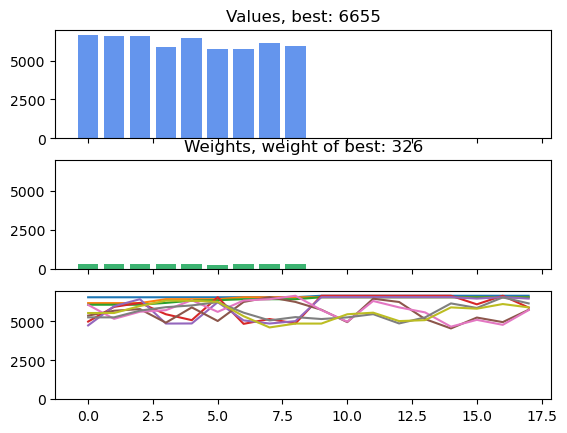

Max weight allowed: 359, the weight of found: 326
Max value found: 6655, sum of all values: 10410


In [3]:
b = Backpack()
g = Genetic_optimization(b, pop_num_max = 20, top_best = 3, prob_mutation = 0.3, pop_size = 10)
g.plot_dynamic(2)

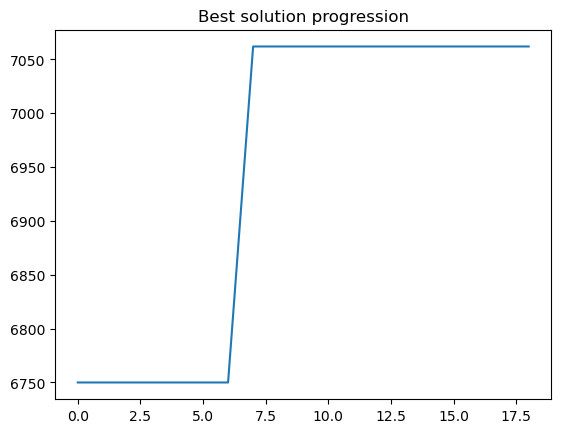

Max weight allowed: 359, the weight of found: 338
Max value found: 7062, sum of all values: 10410


In [6]:
g.plot_best()

## Запис та читання з файлу:

In [11]:
def write_to_csv(Backpack, filename):
    data = pd.DataFrame({Backpack.max_weight:Backpack.weights, Backpack.items:Backpack.values})
    data.to_csv(filename, index=False)

def read_from_csv(filename):
    dataframe = pd.read_csv(filename)
    max_weight, items = int(list(dataframe)[0]), int(list(dataframe)[1])
    weights = dataframe[str(max_weight)]
    values = dataframe[str(items)]
    return Backpack(items, max_weight, weights, values)

In [13]:
b1 = Backpack()
write_to_csv(b1, 'data.csv')

In [15]:
ls -a

./                  .ipynb_checkpoints/ data.csv            greedy.py
../                 __pycache__/        genetic.py          lab_5.ipynb


In [17]:
read_from_csv('data.csv')

## Генетичний алгоритм для даних, записаних в файл:

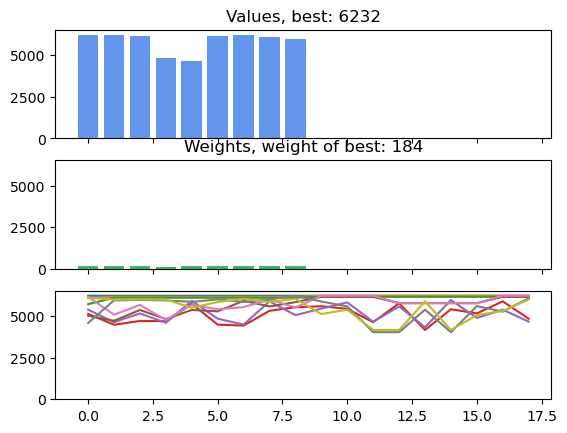

Max weight allowed: 202, the weight of found: 184
Max value found: 6232, sum of all values: 11828


In [19]:
g1 = Genetic_optimization(b1, pop_num_max = 20, top_best = 3, prob_mutation = 0.3, pop_size = 10)
g1.plot_dynamic(2)

## Жадібний алгоритм:

#### Індекси речей, які забрано до рюкзака:

In [21]:
gr = Greedy(b)
gr.solution

[8, 29, 40, 16, 36, 4, 13, 41, 25, 35, 22, 9, 37, 6, 24, 39, 11]

#### Сума ваг та вартостей цих речей:

In [23]:
b.find_sum(gr.solution)

[356, 2150]

#### Максимальна дозволена вага:

In [25]:
b.max_weight

359

#### Сума всіх ваг та вартостей:

In [27]:
b.find_sum([i for i in range(b.items)], for_all = True)

[651, 10410]